<a href="https://colab.research.google.com/github/n8mcdunna/Traffic_stops/blob/master/Tuesday/Unit_1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variables/Names
Month 1-12  (Month)
Reason for Stop  (RsnStop)
Officer Race  (OffRace)
Officer Male   (OffMale)
Officer Years Service   (OffYrsSrv)
Driver Race   (DrvRace)
Driver Hispanic  (DrvHisp)
Driver Male   (DrvMale)
Driver Age  (DrvAge)
Search Vehicle (SrchVhcl)
Result of Stop (RsltStop)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [58]:
df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/trafficstop.csv')

In [ ]:
# Description of data http://users.stat.ufl.edu/~winner/data/trafficstop.txt

In [169]:
df.columns = ['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Officer Years of Service', 'Driver Race', 'Driver Hispanic', 
              'Driver Gender', 'Driver Age', 'Search of Vehicle', 'Result of Stop']
reason_labels = ['Checkpoint', 'DWI', 'Investigation', 'Other', 'Safe\nMovement', 'Seatbelt', 'Speeding', 'StopLight\nor Sign', 'Vehicle\nMovement', 'Vehicle\nRegistry']
officer_race_labels = ['Native American', 'Asian', 'African American', 'Hispanic', 'White', 'Unspecified']
driver_race_labels = ['Asian', 'African American', 'Native American', 'Other/Unknown', 'White']
result_labels = ['No Action Taken', 'Verbal Warning', 'Written Warning', 'Citation', 'Arrest']

In [60]:
df['Officer Race'] = df['Officer Race'].replace(np.nan, 6) # replacing NaNs in officer race with 6. NaN did stand for undefined

In [7]:
cat_variables = df.loc[:,['Month', 'Reason for Stop', 'Officer Race', 'Officer Gender', 'Driver Race', 'Driver Hispanic', 'Driver Gender', 'Search of Vehicle', 'Result of Stop']]
num_variables = df.loc[:,['Officer Years of Service', 'Driver Age']]
men = df[df['Driver Gender'] == 1]
women = df[df['Driver Gender'] == 0]

In [8]:
print(df.shape)
df.head()

(79884, 11)


,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop
0,8,8,3.0,0,22,2,2,1,40,0,2
1,1,8,5.0,1,18,2,2,1,26,1,4
2,1,8,5.0,1,18,2,2,0,25,0,2
3,11,7,3.0,0,23,5,1,1,41,0,2
4,12,7,3.0,0,23,5,2,1,53,0,2


In [8]:
print(men.shape)
print(women.shape)
men.head()

(46294, 11)
(33590, 11)


,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop
0,8,8,3.0,0,22,2,2,1,40,0,2
1,1,8,5.0,1,18,2,2,1,26,1,4
3,11,7,3.0,0,23,5,1,1,41,0,2
4,12,7,3.0,0,23,5,2,1,53,0,2
5,4,10,5.0,1,22,2,2,1,24,0,2


In [9]:
men['Driver Age'].value_counts()

30    3273
25    3033
40    2535
35    2288
45    1889
      ... 
10       1
91       1
92       1
13       1
12       1
Name: Driver Age, Length: 83, dtype: int64

In [110]:
men.sort_values(by= 'Driver Age')

,Month,Reason for Stop,Officer Race,Officer Gender,Officer Years of Service,Driver Race,Driver Hispanic,Driver Gender,Driver Age,Search of Vehicle,Result of Stop,Age Group
27896,4,5,5.0,1,20,2,2,1,10,0,3,2-18
5762,1,3,5.0,1,3,2,2,1,12,0,2,2-18
48058,7,5,5.0,1,17,2,2,1,13,1,5,2-18
10034,2,8,3.0,1,8,2,2,1,14,0,2,2-18
76159,11,5,3.0,0,3,5,1,1,14,0,4,2-18
...,...,...,...,...,...,...,...,...,...,...,...,...
43432,6,5,4.0,1,11,5,2,1,91,0,2,65+
76255,11,7,5.0,1,28,5,2,1,92,0,2,65+
72913,11,10,5.0,1,4,4,2,1,99,0,1,65+
38572,5,7,5.0,1,6,4,2,1,99,1,1,65+


In [111]:
men['Driver Age'].value_counts()

30    3273
25    3033
40    2535
35    2288
45    1889
      ... 
10       1
91       1
92       1
13       1
12       1
Name: Driver Age, Length: 83, dtype: int64

In [9]:
# Putting age into categories to make cleaner looking graph
bins = [x for x in range(10, 80, 10)]
names = ['<20', '20s', '30s', '40s', '50s', '60+']
df['Age Group'] = pd.cut(df['Driver Age'], bins, labels= names)
print(names[::-1])

['60+', '50s', '40s', '30s', '20s', '<20']


In [10]:
# Getting the male and female drivers age group totals
male_drivers_by_age_group = df[df['Driver Gender'] == 1]['Age Group'].value_counts(ascending= True)
female_drivers_by_age_group = df[df['Driver Gender'] == 0]['Age Group'].value_counts(ascending= True) * -1
print(male_drivers_by_age_group)

60+     1531
<20     3789
50s     4447
40s     7716
30s    11366
20s    16961
Name: Age Group, dtype: int64


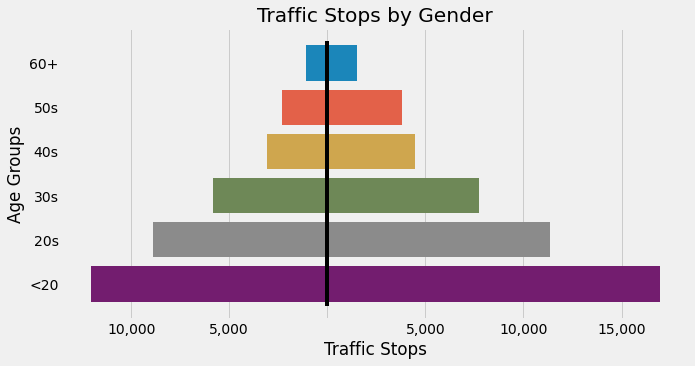

In [20]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

fig.set_figheight(5)
fig.set_figwidth(10)

bar_plot = sns.barplot(x= male_drivers_by_age_group, y= names[::-1])
bar_plot = sns.barplot(x= female_drivers_by_age_group, y= names[::-1])
midline = plt.vlines(x=0, ymin= -0.5, ymax= 5.5)


bar_plot.set(xlabel= "Traffic Stops",
             ylabel= 'Age Groups',
             title= 'Traffic Stops by Gender',
             xticklabels= ['15,000','10,000', '5,000', '', '5,000', '10,000', '15,000'])

plt.show();

In [43]:
# Getting the male and female drivers age group totals
drivers_by_age_group = df['Age Group'].value_counts(ascending= True)

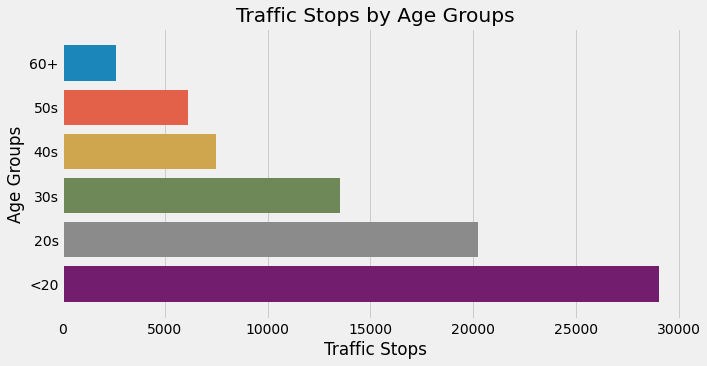

In [44]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

fig.set_figheight(5)
fig.set_figwidth(10)

bar_plot = sns.barplot(x= drivers_by_age_group, y= names[::-1])
midline = plt.vlines(x=0, ymin= -0.5, ymax= 5.5)


bar_plot.set(xlabel= "Traffic Stops",
             ylabel= 'Age Groups',
             title= 'Traffic Stops by Age Groups')

plt.show();

In [ ]:
df['Driver Hispanic'].value_counts()

2    72306
1     7578
Name: Driver Hispanic, dtype: int64

In [33]:
# Getting the male and female drivers age group totals
white_drivers_by_age_group = df[df['Driver Race'] == 5]['Age Group'].value_counts(ascending= True)
black_drivers_by_age_group = df[df['Driver Race'] == 2]['Age Group'].value_counts(ascending= True) * -1
print(black_drivers_by_age_group)

60+    -1090
<20    -2961
50s    -3538
40s    -6808
30s   -11019
20s   -17342
Name: Age Group, dtype: int64


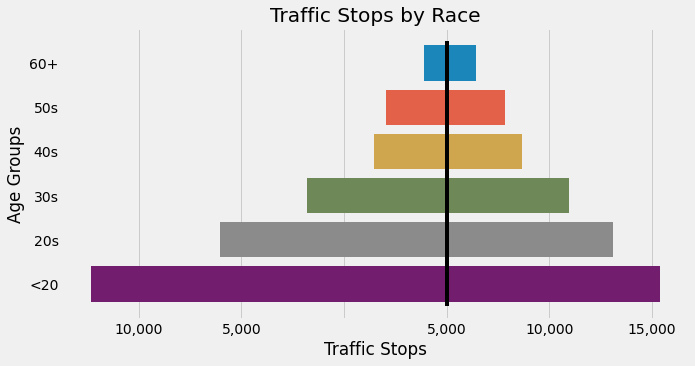

In [34]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')

fig.set_figheight(5)
fig.set_figwidth(10)

bar_plot = sns.barplot(x= white_drivers_by_age_group, y= names[::-1])
bar_plot = sns.barplot(x= black_drivers_by_age_group, y= names[::-1])
midline = plt.vlines(x=0, ymin= -0.5, ymax= 5.5)


bar_plot.set(xlabel= "Traffic Stops",
             ylabel= 'Age Groups',
             title= 'Traffic Stops by Race and Age',
             xticklabels= ['15,000','10,000', '5,000', '', '5,000', '10,000', '15,000'])

plt.show();

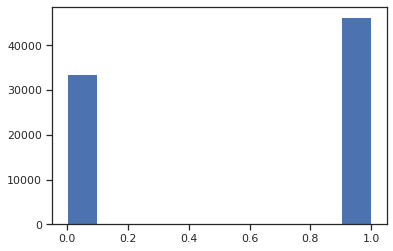

In [ ]:
plt.hist(df['Driver Gender'])
plt.show()

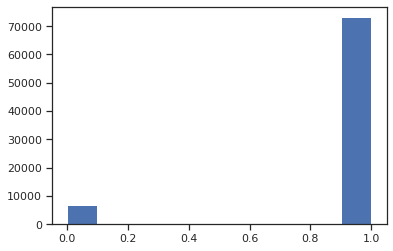

In [ ]:
plt.hist(df['Officer Gender'])
plt.show()

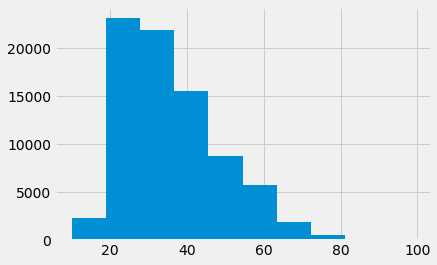

In [18]:
plt.hist(df['Driver Age'])
plt.show()

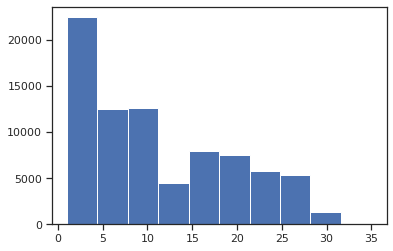

In [ ]:
plt.hist(df['Officer Years of Service'])
plt.show()

In [ ]:
df['Driver Race'].value_counts()

2    42970
5    32969
4     2422
1     1461
3       62
Name: Driver Race, dtype: int64

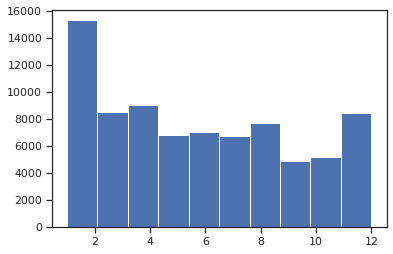

In [ ]:
plt.hist(df['Month'])
plt.show()

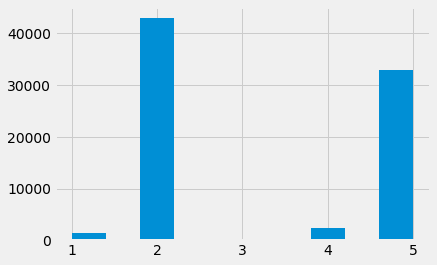

In [35]:
plt.hist(df['Driver Race'])
plt.show()

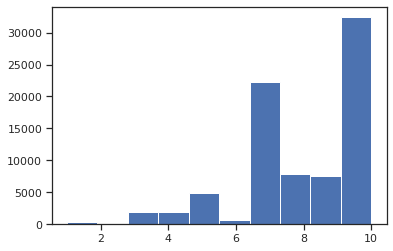

In [ ]:
plt.hist(df['Reason for Stop'])
plt.show()

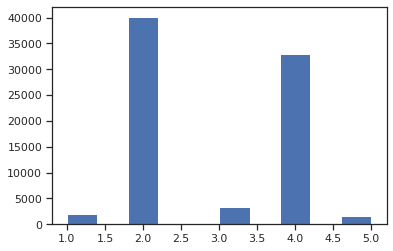

In [ ]:
plt.hist(df['Result of Stop'])
plt.show()

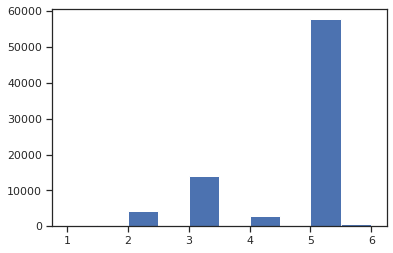

In [ ]:
plt.hist(df['Officer Race'])
plt.show()

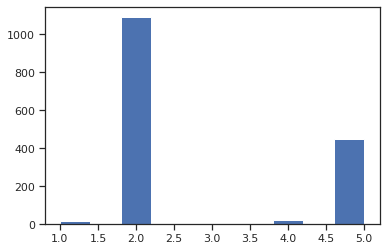

In [ ]:
arrests = df[df['Result of Stop'] == 5]
plt.hist(arrests['Driver Race'])
plt.show()

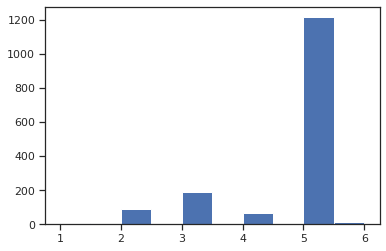

In [ ]:
plt.hist(arrests['Officer Race'])
plt.show()

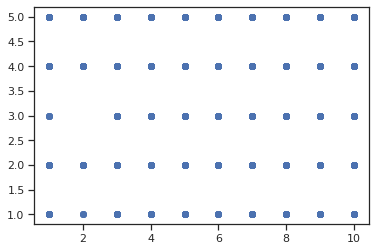

In [ ]:
plt.scatter(df['Reason for Stop'], df['Result of Stop'])
plt.show()

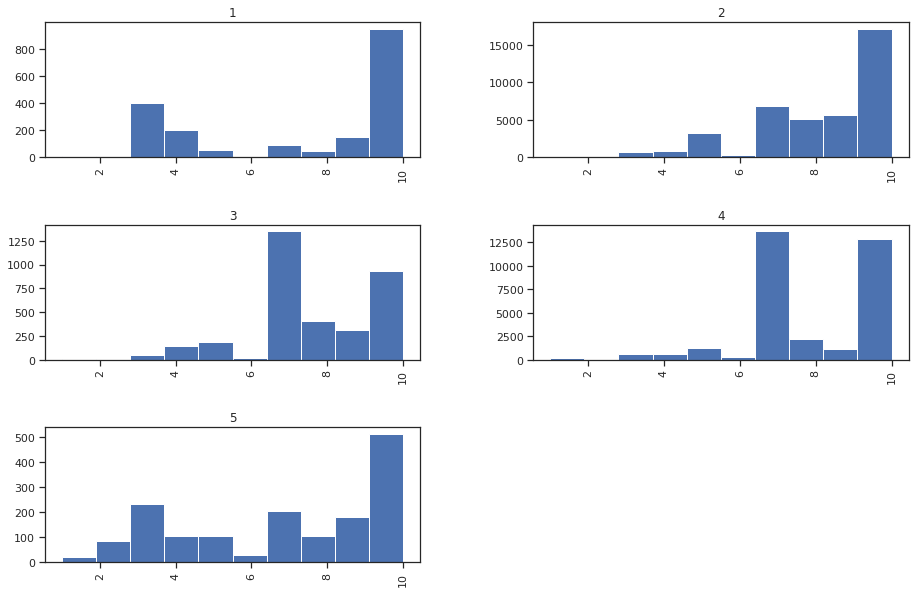

In [ ]:
df['Reason for Stop'].hist(by = df['Result of Stop'], figsize = (15,10));

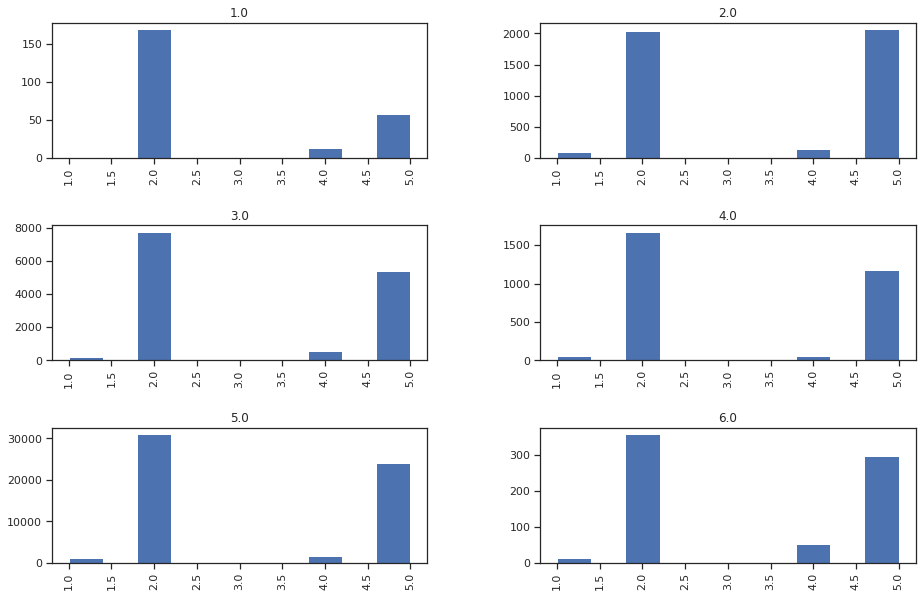

In [ ]:
df['Driver Race'].hist(by = df['Officer Race'], figsize = (15,10));


Officer Race,1.0,2.0,3.0,4.0,5.0,6.0
Driver Race,,,,,,
1,0.068446,6.707734,15.195072,3.627652,73.374401,1.026694
2,0.393298,4.740517,18.017221,3.893414,72.127065,0.828485
3,0.000000,3.225806,30.645161,4.838710,59.677419,1.612903
4,0.536746,6.028076,22.460776,2.477291,66.350124,2.146986
5,0.175923,6.266493,16.254663,3.566987,72.835088,0.900846
All,0.301687,5.444144,17.382705,3.711632,72.257273,0.902559


In [ ]:
g, p_value, dof, expected = chi2_contingency(pd.crosstab(df['Driver Age'], df['Officer Years of Service']))
p_value

0.0

In [ ]:
pd.crosstab(df['Driver Age'], df['Officer Race'], margins= True, normalize= 'index') * 100


Officer Race,1.0,2.0,3.0,4.0,5.0,6.0
Driver Age,,,,,,
10,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
13,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
14,0.000000,0.000000,66.666667,0.000000,33.333333,0.000000
15,0.000000,0.000000,3.225806,6.451613,90.322581,0.000000
...,...,...,...,...,...,...
91,0.000000,0.000000,0.000000,33.333333,66.666667,0.000000
92,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
93,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000


In [ ]:
#sns.set(style="ticks", color_codes=True)
g = sns.PairGrid(df, hue= 'Driver Race')
g.map(sns.scatterplot)
#sns.pairplot(df)

In [ ]:
pd.crosstab(df['Month'], df['Search of Vehicle'], margins= True, normalize= 'index') * 100

Search of Vehicle,0,1
Month,,
1,95.557618,4.442382
2,95.763256,4.236744
3,95.785396,4.214604
4,96.004415,3.995585
5,95.199883,4.800117
6,96.271090,3.728910
7,96.010049,3.989951
8,96.173304,3.826696
9,96.620117,3.379883


In [ ]:
def chi_square(column_name):
  results = [(column, chi2_contingency(pd.crosstab(cat_variables[column], cat_variables[column_name]))[1]) for column in cat_variables.columns]
  results = pd.DataFrame(results)
  results.columns = ['Variable', 'p-value']
  results = results.sort_values(by= ['p-value'])
  return results

In [ ]:
chi_square('Reason for Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
4,Driver Race,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
5,Driver Hispanic,1.239846e-139
2,Officer Race,1.467362e-133
0,Month,5.973070e-127
3,Officer Gender,3.315326e-125
6,Driver Gender,1.074974e-77


In [ ]:
chi_square('Result of Stop')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
2,Officer Race,2.701179e-261
6,Driver Gender,5.981797e-87
4,Driver Race,1.027880e-83
0,Month,5.788958e-54
5,Driver Hispanic,4.732458e-47
3,Officer Gender,6.830459e-11


In [ ]:
chi_square('Search of Vehicle')

,Variable,p-value
1,Reason for Stop,0.000000e+00
7,Search of Vehicle,0.000000e+00
8,Result of Stop,0.000000e+00
6,Driver Gender,1.137851e-195
4,Driver Race,5.338474e-160
2,Officer Race,2.020537e-28
3,Officer Gender,4.963004e-08
5,Driver Hispanic,1.837276e-04
0,Month,1.871583e-03


10    32405
7     22222
8      7946
9      7535
5      4827
3      1992
4      1926
6       631
1       286
2       114
Name: Reason for Stop, dtype: int64

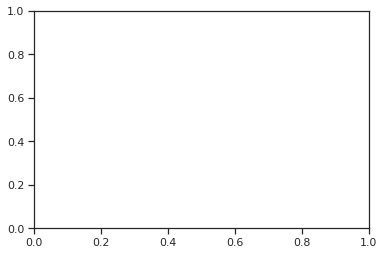

In [ ]:


df['Reason for Stop'].value_counts()  

In [ ]:
df['Reason for Stop'].values

array([ 8,  8,  8, ...,  7, 10,  9])

In [ ]:
for reason in df['Reason for Stop'].value_counts():
  print(reason)

32405
22222
7946
7535
4827
1992
1926
631
286
114


In [159]:
df2 = pd.crosstab(df['Result of Stop'], df['Reason for Stop'], margins= True, normalize= True)*100

In [160]:
df2[1]

Result of Stop
1      0.011266
2      0.045065
3      0.005007
4      0.269140
5      0.027540
All    0.358019
Name: 1, dtype: float64

In [161]:
df2

Reason for Stop,1,2,3,4,5,6,7,8,9,10,All
Result of Stop,,,,,,,,,,,
1,0.011266,0.003755,0.503230,0.250363,0.068850,0.007511,0.115167,0.058835,0.186520,1.190476,2.395974
2,0.045065,0.017525,0.843723,1.032747,4.102198,0.388063,8.617495,6.443092,7.155375,21.513695,50.158981
3,0.005007,0.000000,0.062591,0.177758,0.230334,0.026288,1.689950,0.505733,0.389315,1.162936,4.249912
4,0.269140,0.013770,0.794903,0.817435,1.512193,0.331731,17.141105,2.806570,1.473386,16.057033,41.217265
5,0.027540,0.107656,0.289169,0.132692,0.128937,0.036303,0.254118,0.132692,0.227830,0.640929,1.977868
All,0.358019,0.142707,2.493616,2.410996,6.042512,0.789895,27.817836,9.946923,9.432427,40.565069,100.000000


In [162]:
df['Result of Stop'].value_counts()

2    40069
4    32926
3     3395
1     1914
5     1580
Name: Result of Stop, dtype: int64

In [163]:
result_labels

['No Action\n Taken',
 'Verbal \nWarning',
 'Written \nWarning',
 'Citation',
 'Arrest']

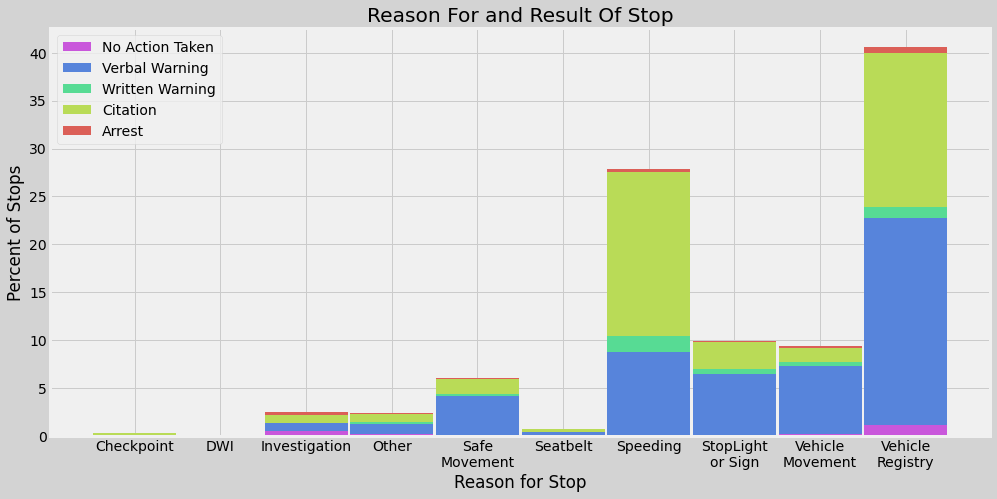

In [170]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
color = ['k', '#6D904F', 'orange', '#810F7C', '#F41A1A']
#colors = ['g', 'r', 'b', 'purple', 'orange', 'k', 'magenta', 'pink', 'olive', 'cyan', 'brown']

color = sns.color_palette('hls', 5)


for j in range(1, 11):
  foundation = 0
  for i in range(1, 6):
    ax.bar(x= j, bottom= foundation, height= df2[j][i], width= 0.97, color= color[5-i])
    foundation += df2[j][i] 

plt.title('Reason For and Result Of Stop')
fig.set_figheight(7)
fig.set_figwidth(15)
fig.set_facecolor('lightgrey')
ax.set_xlabel('Reason for Stop')
ax.set_ylabel('Percent of Stops')
ax.legend(labels= result_labels)
ax.set_xticklabels(reason_labels)
ax.set_xticks(ticks= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.show();

In [172]:
df3 = pd.crosstab(df['Driver Race'], df['Driver Gender'], normalize= True)*100
df3

Driver Gender,0,1
Driver Race,,
1,0.693506,1.135396
2,23.462771,30.327725
3,0.035051,0.042562
4,0.957639,2.074258
5,16.899504,24.371589


In [142]:
df3[1]

Driver Race
1     1.135396
2    30.327725
3     0.042562
4     2.074258
5    24.371589
Name: 1, dtype: float64

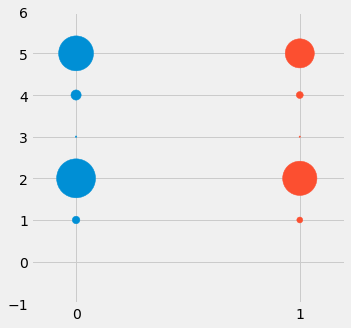

In [174]:
fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(5)

ax.scatter(x= np.zeros(5), y= [1, 2, 3, 4, 5], s= df3[1] * 50)
ax.scatter(x= np.zeros(5) + 1, y= [1, 2, 3, 4, 5], s= df3[0] * 50)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, 6)
ax.set_xticks(ticks= [0,1])
plt.show()